## Increasing value of $\lambda\;or\;\gamma\;$ too much can lead to underfitting 

Statsquest Xgboost: https://www.youtube.com/watch?v=OtD8wVaFm6E&list=PLblh5JKOoLULU0irPgs1SnKO6wqVjKUsQ

Statsquest Xgboost (with python) : https://www.youtube.com/watch?v=GrJP9FLV3FE

# XGBoost:

XGBoost is a popular library for training gradient boosting models, which are a type of ensemble machine learning model that combines the predictions of multiple weak models to create a stronger, more accurate model. XGBRegressor is a class in the XGBoost library that is used to train gradient boosting models for regression tasks (predicting a continuous value).



Unlike other boosting algorithms where weights of misclassified branches are increased, in Gradient Boosted algorithms the loss function is optimised. XGBoost is an advanced implementation of gradient boosting along with some regularization factors.

### Necessities for XGBoost:


- <span class="girk">Numeric features should be scaled


- <span class="girk">Categorical features should be encoded</span></span>

### How XGBoost is different from decision Trees?

The trees used by XGBoost are a bit different than traditional decision trees. They are called __CART trees (Classification and Regression trees)__ and instead of containing a single decision in each “leaf” node, they contain real-value scores of whether an instance belongs to a group. 

After the tree reaches max depth, the decision can be made by converting the scores into categories using a certain threshold.

### XgBoost : Extreme Gradient Boosting (Link: https://xgboost.ai/)

- ___Extremely Fast :___
     <br></br>
     - __Parallelization__ : Task is divided in different processors.
     <br></br>
     - __Cache Optimization__
     <br></br>
     - __Out of Core programming__
        <br></br>

- ___Performance :___
<br></br>
     - __Built in Regularisation parameter $\;(\lambda)$ to reduce overfitting__
     <br></br>
     - __Pruning$(\gamma)$ to reduce overfitting__
     <br></br>
     - __Automatically handles missing values__
     <br></br>
     - __Has inbuilt Cross validation__
     <br></br>
     - __Handles Outliers to some extent__
<br></br>
- ___Compatibility : Compatible with all languages and cloud services integration___

## Regression

___

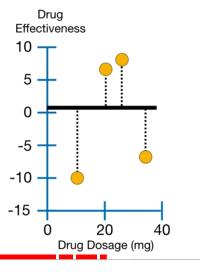

We will make and initial prediction. By default initial prediction is 0.5 for Both XGBoost for Classification and Regression.

0.5 is the thick black line present in the picture

XGBoost uses a unique XGBoost Tree for Regression

### Steps in XGBoost Regression:

1. All trees start out as single leaf and all the residuals go to the leaf.



- __The residuals points are -10.5, 6.5, 7.5, -7.5__ which is difference between 0.5 and each data points respectively.
<br></br>
    - XgBoost will fit a unique XGBoost tree to the residuals.



2. Now we calculate a <span class="mark">___Quality or Similarity Score___</span> for the Residuals 


$$SS = \frac{(Sum\;of\;residuals)^2}{number\;of\;residual\;+\;\lambda}$$



3. Now we will put all the residuals in the numerator $(-10.5+6.5+7.5-7.5)^2$ and denominator = 4 + 0 = 4


$$SS = \frac{(-10.5\;+\;6.5\;+\;7.5\;-\;7.5)^2}{4\;+\;0}\;\;=\;\;4 $$


- So Similarity Score for the residuals in the root node is 4.


- <span class="mark"> $\lambda$ is a regularisation parameter which is 0 here.</span>



### Lambda $(\lambda)\;$ is a Regularization Prameter, which means it is intended to reduce the prediction's sensitivity to individual observations.


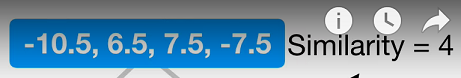

#### Tree split on drugs : 

- We will split the residuals in different groups and calculate the Similarty score for each different split.


- Dosage is the value of the red line which divides the residuals into different groups.

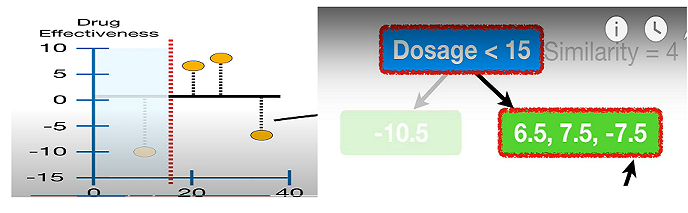

- Similarity Score for leaf on the left with -10.5

$$SS=\;\frac{(-10.5)^2}{1+0}\;=\;110.25$$


- Similarity Score for leaf on the right with 6.5, 7.5, -7.5

$$SS=\;\frac{(6.5\;+\;7.5\;+\;(-7.5))^2}{3+0}\;=\;14.08$$

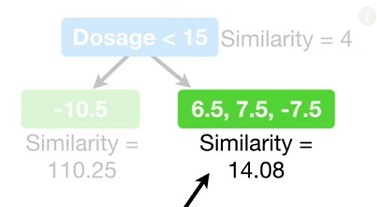

### Note: When residual cancel out each other then the Similarity score is relatively less, whereas when there is only 1 point in the leaf, the similarity score is very large. This happens due to higher denominator

We need to quantify how much better the leaves cluster similar residual than the root.

## <span class="mark">Most importnat formula is of Gain</span>

We do this when we calculate the Gain of splitting the Residual into two groups:


$$Gain\;=\;Left_{\;Similarity}\;+\;Right_{\;Similarity}\;-\;Root_{\;Similarity}$$

&emsp;$$Gain\;=\;110.25\;+\;14.08\;-\;4\;\;=\;\;120.33$$

##### Now for next Decision tree by shifting the threshold

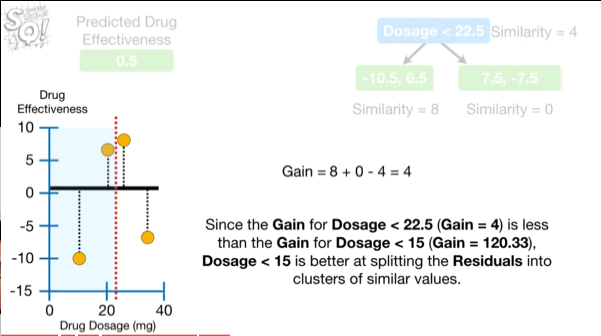

##### For next Decision Tree by Shifting the threshold again

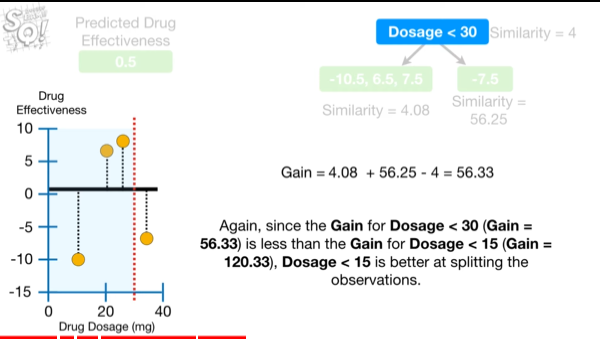

### So the first branch in the tree will be of Dosage<15 as it has the highest Gain

#### Splitting the nodes further after we has fixed the root node:

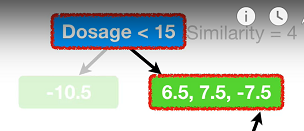

Left node cannot be further splitted. So, splitting right node with 3 residuals.

avg = 22.5

- So first Dosage < 22.5

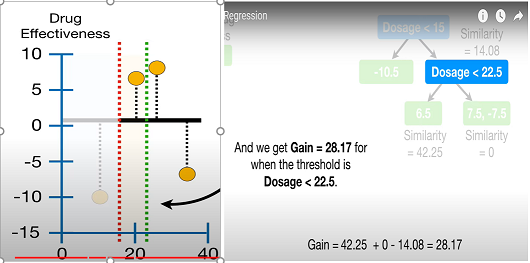

##### Now shifting the average line for right leaf and average is of last 2 residuals

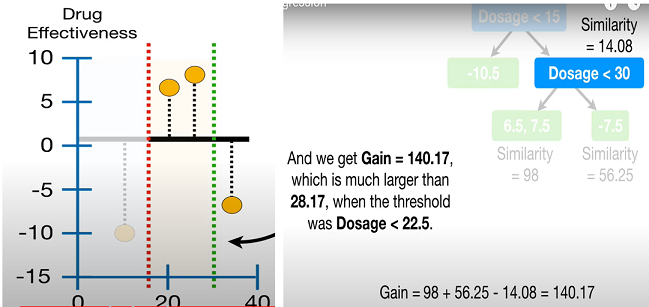

#### So we will use Dosage <30 for this branch 

We will not do further split as tree depth was kept as 2

### Pruning in Regression of XGBoost

- We Prune XGBoost tree based on it's Gain value.



- Randomly pick up a number called $Gamma(\gamma)$



- We calculate difference between the Gain associated with the lowest branch of the tree and Gamma:

$$If\;difference\;between\;GAIN\;-\;\gamma\;=\;+ve\;we\;accept\;that\;branch$$

$$If\;difference\;between\;GAIN\;-\;\gamma\;=\;-ve\;we\;remove\;that\;branch$$

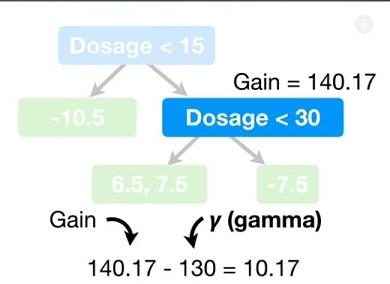


for the above branch __Dosage < 30__

$Gain\;-\gamma\;=\;140.17\;-\;130\;=\;+10.17$

So we will accept this branch.

## NOTE:

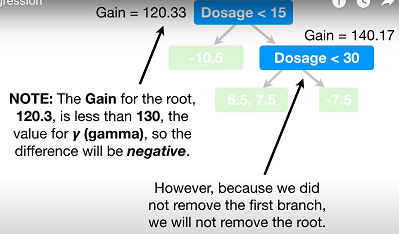

If the Gain - $\gamma$ is negative for lowest node, we will remove that. Ans if it is negative for root node as well, We will remove the entire branch.

___

### Now Building the tree again but taking value of $\lambda\;=\;1$


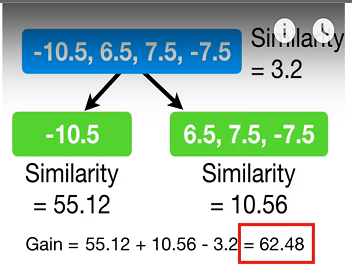

### NOTE: When $\lambda >0$ the Similarity Scores are smaller and amount of decrease is inversely proportional to the number of Residuals in the node.

The leaf on the left had only 1 residual and it had the largest decrease in Similarity score 50%. In contrast the root node had all 4 Residuals and the smallest decrease 20%

#### Comparing for Dosage < 30 branch:

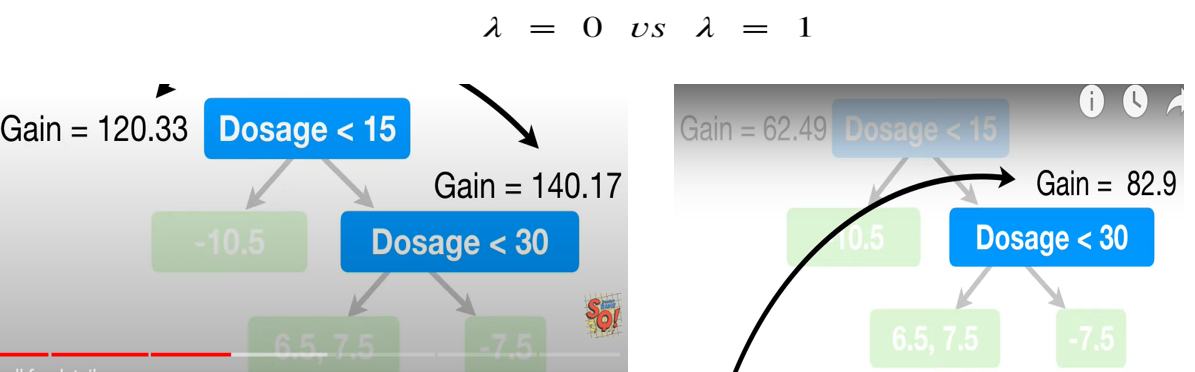

### When $\lambda\;\geq\;1$, it is easier to prune leaves because the values for Gain are smaller preventing Overfitting The Training data

___

## Final prediction using XGBoost : 

### Output Value:


$$Output\;Value\;=\;\frac{Sum\;of\;residuals}{number\;of\;residual\;+\;\lambda}$$


__It is different from Similarity Score as we are not squaring the sum of residuals__

#### Output value whene $\lambda\;=\;0$

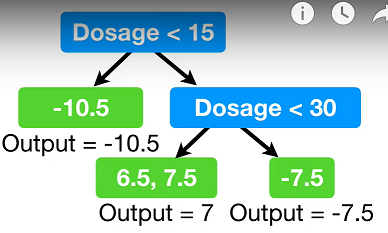

$$Final\;Prediction\;=\;Default\;initial\;prediction\;+\;\eta\;*\;output\;value$$

$Default\;\eta\;value\;=\;0.3$

- for Drug Dosage value = 10 previous residual was -10.5

final prediction for point 10 = 0.5 + (0.3 * 10) = -2.65


- for Drug Dosage value = 20 previous residual was 6.5

final prediction for point 20 = 0.5 + (0.3 * 7) = 2.6


- for Drug Dosage value = 25 previous residual was 7.5

final prediction for point 25 = 0.5 + (0.3 * 7) = 2.6


- for Drug Dosage value = 35 previous residual was -7.5

final prediction for point 10 = 0.5 + (0.3 * -7.5) = -1.75



We can see there is a decrese in all the residuals from it's respective previous values. suggesting each small step is in the right direction.

### Like This we will create more trees and get more lesser residuals

## NOTE : $\lambda$ (lambda) is a Regularization parameter and when $\lambda>0$ it results in more pruning, by shrinking the similarity score and it results in smaller Output values for the leaves.

___

### Cover for Regression

The minimum number of Residual in each leaf is determined by calculating the Cover.

Cover is defined as the denominator of the Similarity Score  minus $\lambda$ lambda

$$Cover\;=\;number\;of\;residual\;in\;each\;leaf$$

# Steps for XGBoost Regression:


1. We calculate Similarity Score (SS) and Gain to determine how to split the data


2. We prune the tree calculating Gain - gamma ($\gamma$) 

- if positive, then do not prune

- if negative, then prune

3. We calculate Output values of all the leaves


4. $\lambda$ is a Regularization Paramater and when $\lambda>0$, it results in more pruning, by shrinking the Similarity Score and it results in smaller Output Values for the leaves.

## Code

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
from sklearn.datasets import load_boston

In [11]:
X,y = load_boston(return_X_y=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [12]:
print(X.shape)

(506, 13)


In [13]:
print(y.shape)

(506,)


In [14]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [15]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
xgb = XGBRegressor(eta = 0.1, gamma = 10) #eta is learning rate k and gamma is for pruning
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
print("XGBoost",np.mean(cross_val_score(xgb,X,y,cv=10)))
print("Gradient Boost",np.mean(cross_val_score(gb,X,y,cv=10)))
print("Random Forest",np.mean(cross_val_score(rf,X,y,cv=10)))

XGBoost 0.4486301944281201
Gradient Boost 0.4494825155606705
Random Forest 0.47282921220435836


In [19]:
xgb = XGBRegressor(eta = 0.3, gamma = 50, reg_lambda=10) #eta is learning rate kand gamma is for pruning
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()

In [20]:
print("XGBoost",np.mean(cross_val_score(xgb,X,y,cv=10)))
print("Gradient Boost",np.mean(cross_val_score(gb,X,y,cv=10)))
print("Random Forest",np.mean(cross_val_score(rf,X,y,cv=10)))

XGBoost 0.49364538339924413
Gradient Boost 0.43046164822235056
Random Forest 0.5113218134876794


___

# XGBoost Classification

Hyperparameter Tuning XGBoost (Krish_naik): https://www.youtube.com/watch?v=9HomdnM12o4

Initial prediction will be as 0.5

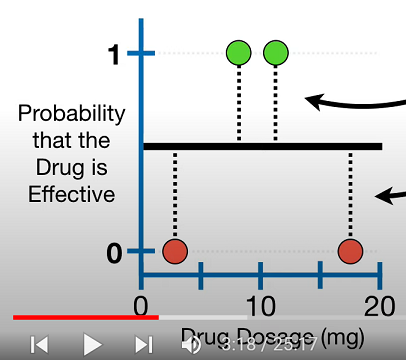

We will fit XGBoost Tree to these Residuals:

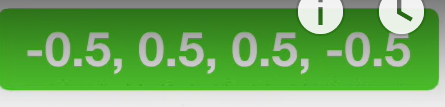

#### root node : Dosage < 15

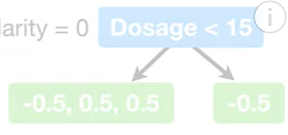

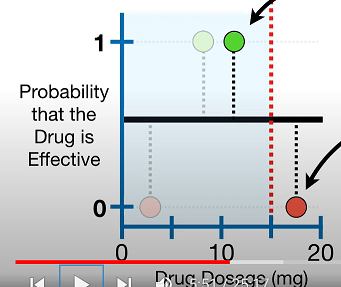

#### Similarity Score for Classification:


$$\frac{(\sum Residual_i)^2}{\sum [Previous\;Probability_{i}\;*\;(1\;-\;Previous\;Probability_{i})]\;+\;\lambda}$$

We chose the threshold Dosage < 15, because 15 is the average value between last two 2 observations.

Previous Probability here will be __0.5__ and $\lambda\;=\;0$

So, similarity of each node:

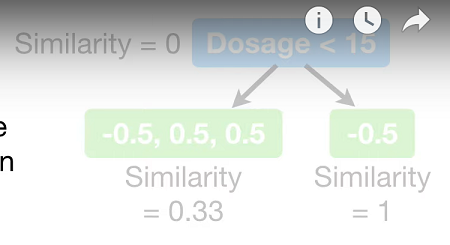

Now,

$$Gain\;=\;Left_{\;Similarity}\;+\;Right_{\;Similarity}\;-\;Root_{\;Similarity}$$

$$Gain\;=\;0.33\;+\;1\;-\;0\;=\;1.33$$

So when we split the observations based on Dosage < 15, Gain = 1.33

we will check similary for all the thresholds.

Dosage < 15 will have highest gain.
<br></br>

##### Now splitting the residual under Dosage < 15 with Dosage < 10

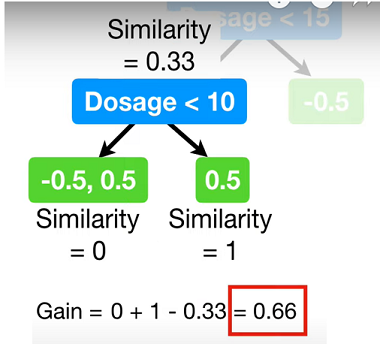

##### Now splitting the residual under Dosage < 15 with Dosage < 5

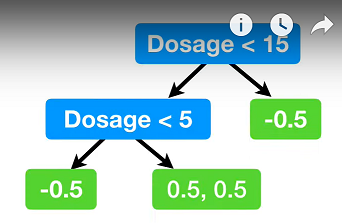

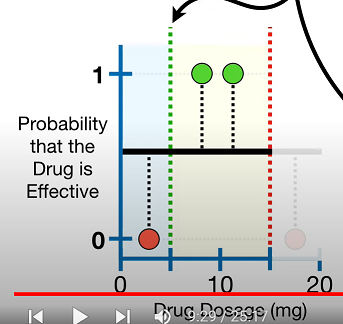

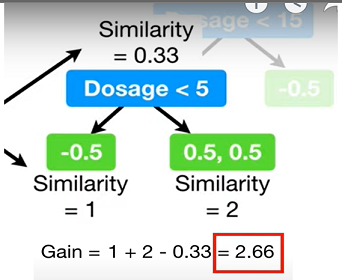

__So, since 2.66 > 0.66, we will use Dosage < 5 as the threshold for this branch.__

We will not split this tree more as max_depth we have kept as 2

___

### Cover for Classification

The minium number of Residual in each leaf is determined by calculating the Cover.

Cover is defined as the denominator of the Similarity Score  minus $\lambda$ lambda

$$Cover\;=\;\sum Previous\;Probability_{i}\;*\;(1\;-\;Previous\;Probability_{i})$$ 
$$for\;residuals\;in\;that\;leaf$$

***by deafult minimum value of cover is 1.*** If it is less than 1 then XGBoost won't allow those leaves.
<br></br>

So to not remove all the leaves. we will set Cover = 0 i.e.  ___min_child_weight = 0___

### Pruning in Classification


It is same as ___Gain - $\gamma$___

and again $\gamma$ will be randomly choosen

#### Values for $\lambda$ greater than 0 reduce the sensitivity of the tree to individual observations by pruning and combining them with other observations.

### Output value for a leaf

$$Output\;=\;\frac{\sum Residual_i}{\sum\;[Previous\;Probability_{i}\;*\;(1\;-\;Previous\;Probability_{i})]\;+\;\lambda}$$

$when\;\lambda\;=\;0,\;Output\;of\;all\;leaves\;is:$

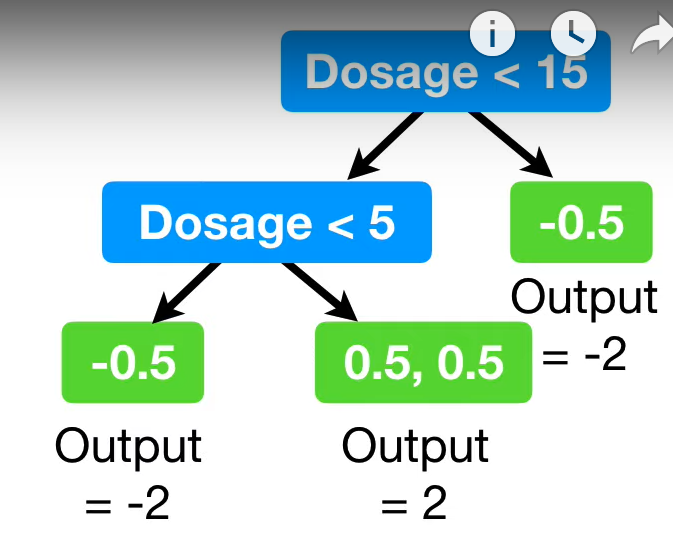

### Prediction

For prediction in terms of Classification,

We convert probability into log of odds. __So previous probability 0.5 = log 0.5 = 0__

So,

$$Prediction\;value\;=\;log(odds)\;+\;\eta\;*\;output$$

$$Probability\;of\;the\;Prediction\;=\;\frac{e^{Prediction\;value}}{1\;+\;e^{Prediction\;value}}$$
<br></br>
$\eta$ (learning rate = 0.3 )

- So for -0.5 leaf (left node) where Dosage = 5 (negative value):

Prediction = 0 + (0.3 * -2) = -0.6 

$So\;probability\;=\;\frac{e^{-0.6}}{1\;+\;e^{-0.6}}\;=\;0.35$


Since 0.35 < 0.5, so newer residual will be smaller


<br></br>
- So for 0.5, 0.5 leaf where Dosage = 8 (positive value):

Prediction = 0 + (0.3 * 2) = 0.6 

$So\;probability\;=\;\frac{e^{0.6}}{1\;+\;e^{0.6}}\;=\;0.65$

Since 0.65 > 0.5, so newer residual will be smaller

<br></br>
Similarly we will calculate residual for all the points.

__New Tree with all the residuals__

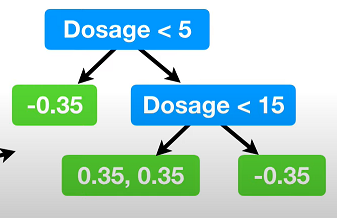

### NOTE: Previous probability for the points of this tree will not be same 

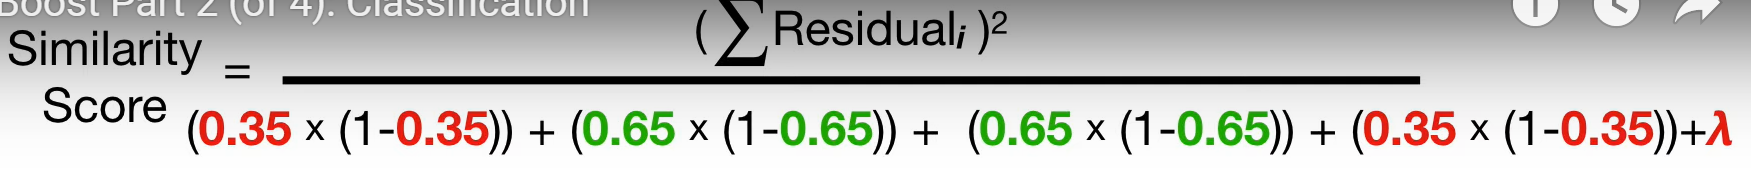

### Even for the Output value for each residual the Previous Probability will be different

## Steps for XGBoost Classification


1. We give previous probility as 0.5 (not always)


2. Calculate Similarity Score and Gain for all the leaves to determine hoe to split the data


3. Prune the tree by calculating the Gain - $\gamma$

- if positive, then do not prune

- if negative, then prune

4. We calculate Output values of all the leaves


5. $\lambda$ is a Regularization Paramater and when $\lambda>0$, it results in more pruning, by shrinking the Similarity Score and it results in smaller Output Values for the leaves.


6. We have to make sure miniumum number of residual in leaf is equal to __Cover__ . Otherewise we prune the leaf.

***

# XGBoost Optimizations : How XGBoost is efficient with large datasets.

### 1. Approximate Greedy Algorithm : 

#### When dataset is huge, XGBoost uses Approximate Greedy Algorithm. Other it uses normal Greedy Algorithm

XGBoost makes decision without looking ahead to see, if it is not the absolute best choice in the long term. XGBoost can build a tree relatively quickly because of it, as it doesn't checks all the possible threshold for other leaves and split is done early on. The decision to use the threshold that gives the largest __Gain__ is made without worrying about how the leaves will be split later.

When we have a lot of datapoints, then Greedy Algortihm becomes slow because it has to still look at every possible threshold.

So instead of checking all the values we can divide it in __Qunatiles__ and only use these quantiles as candidate to split the observations.

eg: instead of using the smallest 2 dosages to define threshold, The Approximate Greedy Algorithm uses the 1st quantile to define the threshold.


by deafult Approximate Greedy Algorithm uses __about__ 33 quantiles.

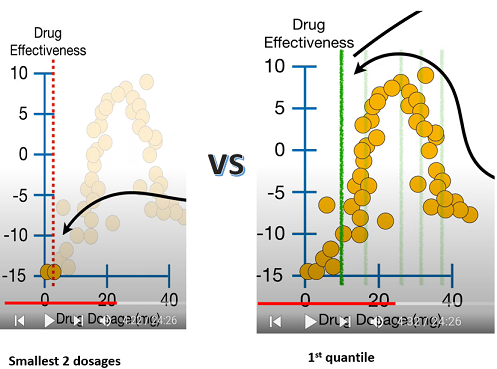

### 2. Parallel Learning

We split the data into small pieces and put the pieces on different computers on a network. The __Quantile Sketch Algorithm__ combines the values from each computer to make an approximate histogram. Then the approxiamte histogram is used to calculate approximate quantiles. 

Approximate Greedy Algorithm uses approximate quantiles.

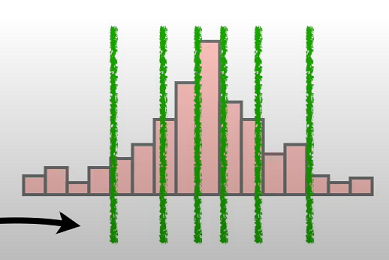

### 3. Weighted Quantile Sketch : merges data from different computers to form a histogram.


Approximate Greedy Algorithm uses **Weighted Quantiles** instead of normal quantiles. 

>what are weighted Quantiles?

Usually quantiles are set up so that the same number of observations are in each one.  i.e 10 observations will be in each qunatiles.

<span class="mark">But in Weighted Qunatile, each observation has a corresponding weights and the sum of the weights are same in each quantile i.e sum of weights in each quantile is 10.</span>

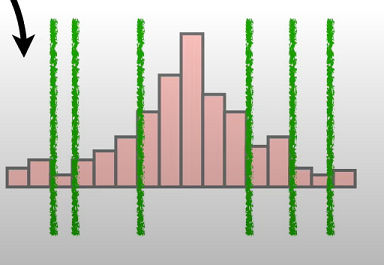

The weights are derived from the __Cover__ metric. Specifically the weight for each observation is the 2nd derivative of the Loss function, that we are referring as **Hessian**

#### NOTE: 

- **For Regression the weights are equal to 1. i.e the weighted quantiles are same as normal qunatiles and contain equal number of observations in case of Regression.**


- **For Classification the weights = Previous Probability * (1 - Previous Probability)**

The approximate histogram is divided into weighted qunatiles that put observations with low confidence predictions into qunatiles with fewer observations. 

When using XGBoost for Classification, the weights for the Weighted Quantile Sketch are calculated from the previously predicted probability(0.5 in this case). 

Weights are calculated after building each tree.

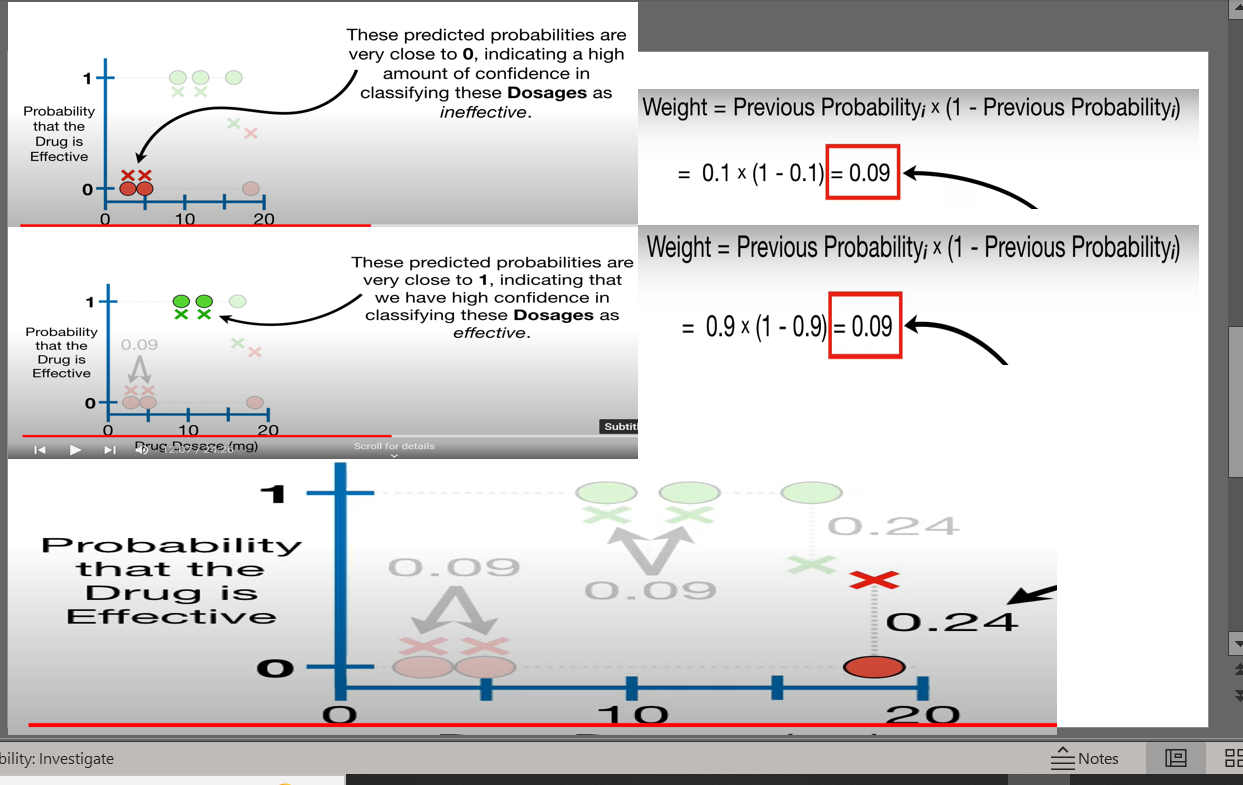

#### <br></br>Instead of using equal quantiles XGBoost tries to make qunatiles that have similar sum of weights


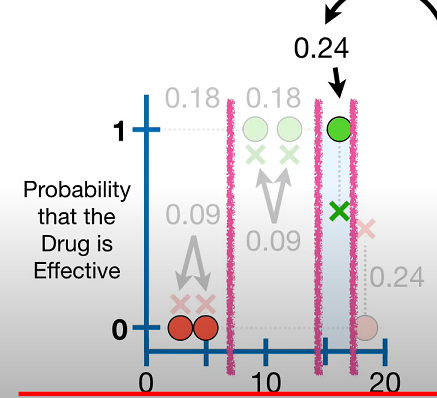

<br></br>
By dividing the observations into quantiles where the sum of weights are similar, we split the two observations with low confidence into seperate bins. So the advantage of weighted quantile sketch is that we get smaller quantile when we need them.

<br></br>

### 4. Sparsity - Aware Split Finding

Sparsity-Aware Split Findings tells us how to build trees with missing values according to their Gain of different combinations of non-missing values together. It tell show how to deal with new observations when thre is a missing value.

### 5. Cache - Aware Access

If you want your program to run really fast, the goal is to maximize what you can do with the Cache Memory(fastest).


So XGBoost puts the Gradients and Heissens in the Cache so that it can rapidly calculate Similarity score and Output values.

### 6. Blocks for Out-of-Core Computation


When the dataset is too large for the Cache and Main Memory, some of it has to be stores in Hard Drive. By spending a little bit of CPU time uncompressing the compressed data, we can avoid spending a lot of time accessing the hard drive. XGBoost uses Sharding if there is mor etha one Hard drive available for Storage to speed up disk access.  

___

## Maths behind XGBoost (Yet to finish)

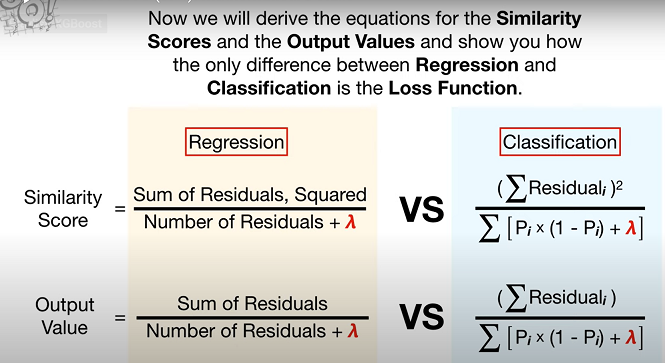